In [1]:
from scipy.signal import find_peaks

In [113]:
from os import listdir
gpx_dir = 'C:\\Users\\banjanss\\OneDrive - UGent\\Documenten\\CyclingClusteringRanking\\Scientific Data\\gpx_files\\gpx_before_dem\\'
files = listdir(gpx_dir)

In [117]:
len(files)

8092

In [195]:
import gpxpy
from gpxpy import gpx
import pandas as pd
import numpy as np
from tqdm import tqdm

def get_number_peaks(series, prominence):
    store = find_peaks(series, prominence = prominence)
    try:
        if (len(store[0])>1)&(np.min(np.diff(store[0]))<prominence):
            return(len(store[1]['prominences'][np.diff(np.insert(store[0],0,0))>prominence]))
        else:
            return(len(store[1]['prominences']))
    except:
        return(len(store[1]['prominences']))

results = []
for file in tqdm(files):
    with open(gpx_dir+file, 'r', encoding="utf-8") as gpx_file:
        gpx = gpxpy.parse(gpx_file)
        track_elevation_series = []
        for data_point in gpx.tracks[0].segments[0].points:
            track_elevation_series.append(data_point.elevation)
        track_elevation_series.append(0)
        
        number_cat4 = get_number_peaks(track_elevation_series, 80)
        number_cat3 = get_number_peaks(track_elevation_series, 160)
        number_cat2 = get_number_peaks(track_elevation_series, 320)
        number_cat1 = get_number_peaks(track_elevation_series, 640)
        number_hc = get_number_peaks(track_elevation_series, 800)

        try:
            loc_last_cat4 = np.max(find_peaks(track_elevation_series, prominence = 80)[0])/len(track_elevation_series)
        except:
            loc_last_cat4 = 0
        try:
            loc_last_cat3 = np.max(find_peaks(track_elevation_series, prominence = 160)[0])/len(track_elevation_series)
        except:
            loc_last_cat3 = 0
        try:
            loc_last_cat2 = np.max(find_peaks(track_elevation_series, prominence = 320)[0])/len(track_elevation_series)
        except:
            loc_last_cat2 = 0
        try:
            loc_last_cat1 = np.max(find_peaks(track_elevation_series, prominence = 640)[0])/len(track_elevation_series)
        except:
            loc_last_cat1 = 0    
        try:
            loc_last_hc = np.max(find_peaks(track_elevation_series, prominence = 800)[0])/len(track_elevation_series)
        except:
            loc_last_hc = 0

        results.append([number_cat4, number_cat3, number_cat2, number_cat1, number_hc, loc_last_cat4, loc_last_cat3, loc_last_cat2, loc_last_cat1, loc_last_hc])    

100%|████████████████████████████████████████████████████████████████████████████| 8092/8092 [1:04:38<00:00,  2.09it/s]


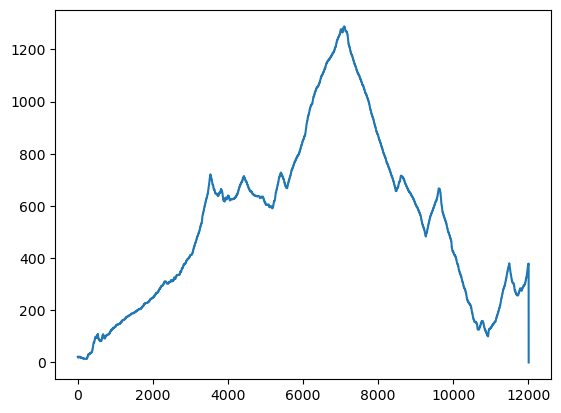

In [206]:
import matplotlib.pyplot as plt

plt.plot(track_elevation_series)

In [196]:
df2 = pd.DataFrame(results)
df2.columns = ['Number Category 4', 'Number Category 3', 'Number Category 2', 'Number Category 1', 'Number Hors Category', 'Location Last Category 4', 'Location Last Category 3', 'Location Last Category 2', 'Location Last Category 1', 'Location Last Hors Category',]
df2['Race Name'] = files

In [197]:
df2.head(50)

,Number Category 4,Number Category 3,Number Category 2,Number Category 1,Number Hors Category,Location Last Category 4,Location Last Category 3,Location Last Category 2,Location Last Category 1,Location Last Hors Category,Race Name
0,1,0,0,0,0,0.500632,0.000000,0.000000,0.000000,0.000000,2017 4 Jours de Dunkerque .gpx
1,8,8,0,0,0,0.791565,0.791565,0.000000,0.000000,0.000000,2017 99a Coppa Bernocchi - 42o GP BPM.gpx
2,1,0,0,0,0,0.666667,0.000000,0.000000,0.000000,0.000000,2017 Abu Dhabi Tour Stage 1.gpx
3,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2017 Abu Dhabi Tour Stage 2.gpx
4,1,1,1,1,1,0.993711,0.993711,0.993711,0.993711,0.993711,2017 Abu Dhabi Tour Stage 3.gpx
5,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2017 Abu Dhabi Tour Stage 4.gpx
6,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2017 ACC Asian Road Championships - ITT.gpx
7,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2017 ACC Asian Road Championships - TTT.gpx
8,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2017 ACC Asian Road Championships.gpx
9,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2017 Amgen Tour of California Stage 1.gpx


In [199]:
df2['Race Name'] = df2['Race Name'].str.replace('.gpx', '')

C:\Users\banjanss\AppData\Local\Temp\ipykernel_11992\2161358018.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Race Name'] = df2['Race Name'].str.replace('.gpx', '')


In [200]:
df2

,Number Category 4,Number Category 3,Number Category 2,Number Category 1,Number Hors Category,Location Last Category 4,Location Last Category 3,Location Last Category 2,Location Last Category 1,Location Last Hors Category,Race Name
0,1,0,0,0,0,0.500632,0.000000,0.000000,0.000000,0.000000,2017 4 Jours de Dunkerque
1,8,8,0,0,0,0.791565,0.791565,0.000000,0.000000,0.000000,2017 99a Coppa Bernocchi - 42o GP BPM
2,1,0,0,0,0,0.666667,0.000000,0.000000,0.000000,0.000000,2017 Abu Dhabi Tour Stage 1
3,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2017 Abu Dhabi Tour Stage 2
4,1,1,1,1,1,0.993711,0.993711,0.993711,0.993711,0.993711,2017 Abu Dhabi Tour Stage 3
...,...,...,...,...,...,...,...,...,...,...,...
8087,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2023 ZLM Tour Prologue
8088,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2023 ZLM Tour Stage 1
8089,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2023 ZLM Tour Stage 2
8090,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,2023 ZLM Tour Stage 3


In [207]:
old_clusters = pd.read_csv('C:\\Users\\banjanss\\OneDrive - UGent\\Documenten\\CyclingClusteringRanking\\clustered_races.csv')

In [211]:
old_clusters

,Unnamed: 0,name2,cluster_labels
0,0,2017 4 Jours de Dunkerque,3
1,1,2017 99a Coppa Bernocchi - 42o GP BPM,5
2,2,2017 Abu Dhabi Tour Stage 1,3
3,3,2017 Abu Dhabi Tour Stage 2,0
4,4,2017 Abu Dhabi Tour Stage 3,5
...,...,...,...
6238,6238,2022 ZLM Tour Stage 1,1
6239,6239,2022 ZLM Tour Stage 2,6
6240,6240,2022 ZLM Tour Stage 3,6
6241,6241,2022 ZLM Tour Stage 4,3


In [212]:
set(old_clusters['name2']).difference(set(df2[df2['Race Name'].isin(old_clusters['name2'])]['Race Name']))

{'2017 Tour of Qinghai Lake Rest day',
 '2018 Africa Cup - Criterium',
 '2018 Toscana Terra di Ciclismo Eroica Rest day',
 '2018 Tour of China I Rest day',
 '2018 Tour of Qinghai Lake Rest day',
 '2019 Tour du Cameroon Rest day',
 '2019 Tour of China I Rest day',
 '2019 Tour of Qinghai Lake Rest day',
 '2019 V4 Ladies Series - Restart Zalaegerszeg',
 '2020 BinckBank Tour Rest day',
 '2022 Carpathian Couriers Race in memory of Waclaw Felczak Rest day'}

In [214]:
new_features = df2[df2['Race Name'].isin(old_clusters['name2'])]

In [216]:
old_features = pd.read_csv('C:\\Users\\banjanss\\OneDrive - UGent\\Documenten\\CyclingClusteringRanking\\Scientific Data\\structured_course_data.csv')

In [219]:
cluster_df = new_features.merge(old_features, on = 'Race Name')

In [230]:
cluster_df['Lowest Elevation'][cluster_df['Lowest Elevation'].isna()] = 0
cluster_df['Highest Elevation'][cluster_df['Highest Elevation'].isna()] = 0
cluster_df['Vertical Gain'][cluster_df['Vertical Gain'].isna()] = 0
cluster_df['Downhill'][cluster_df['Downhill'].isna()] = 0

C:\Users\banjanss\AppData\Local\Temp\ipykernel_11992\782869186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Lowest Elevation'][cluster_df['Lowest Elevation'].isna()] = 0
C:\Users\banjanss\AppData\Local\Temp\ipykernel_11992\782869186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_df['Highest Elevation'][cluster_df['Highest Elevation'].isna()] = 0
C:\Users\banjanss\AppData\Local\Temp\ipykernel_11992\782869186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [231]:
cluster_df['Net Gain'] = cluster_df['Vertical Gain'] - cluster_df['Downhill']

In [233]:
cluster_df['nas'] = cluster_df.isnull().sum(axis=1)

In [243]:
structured_missing = cluster_df[cluster_df['nas']<15]
all_missing = cluster_df[cluster_df['nas']>=15]

In [249]:
structured_missing = structured_missing.fillna(0)

In [569]:
one_day = all_missing[-all_missing['Race Name'].str.contains('Stage')]
stages = all_missing[all_missing['Race Name'].str.contains('Stage')]

In [570]:
one_day = one_day.reset_index(drop = True)

In [571]:
for index, row in one_day.iterrows():
    race = ''.join([i for i in row['Race Name'] if not i.isdigit()])
    if 'Vlaanderen' in race:
        print('Werkt!')
        race='Vlaanderen'
    other_editions = structured_missing[structured_missing['Race Name'].str.contains(race)]
    if other_editions.shape[0]>0:
        col_to_impute = other_editions.columns[row.isna()]
        one_day.loc[index, col_to_impute] = other_editions[col_to_impute].mean()

Werkt!
Werkt!
Werkt!
Werkt!
Werkt!


C:\Users\banjanss\AppData\Local\Temp\ipykernel_11992\3136770471.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  other_editions = structured_missing[structured_missing['Race Name'].str.contains(race)]


Werkt!
Werkt!
Werkt!
Werkt!
Werkt!
Werkt!
Werkt!
Werkt!
Werkt!


In [572]:
one_day.isna().sum()

Number Category 4                0
Number Category 3                0
Number Category 2                0
Number Category 1                0
Number Hors Category             0
Location Last Category 4         0
Location Last Category 3         0
Location Last Category 2         0
Location Last Category 1         0
Location Last Hors Category      0
Race Name                        0
Unnamed: 0                       0
Distance                         1
Street                         345
Road                           345
Paved                          345
Asphalt                        345
Path                           345
Cycleway                       345
Unpaved                        345
State Road                     345
Cobblestones                   345
Unknown                        345
Compacted Gravel               345
Off-grid (unknown)             345
Singletrack                    345
Access Road                    345
Alpine                         345
Net Gain            

In [573]:
df = pd.concat([structured_missing, one_day, stages])

In [574]:
df = df.reset_index()

In [575]:
df.columns

Index(['index', 'Number Category 4', 'Number Category 3', 'Number Category 2',
       'Number Category 1', 'Number Hors Category', 'Location Last Category 4',
       'Location Last Category 3', 'Location Last Category 2',
       'Location Last Category 1', 'Location Last Hors Category', 'Race Name',
       'Unnamed: 0', 'Distance', 'Street', 'Road', 'Paved', 'Asphalt', 'Path',
       'Cycleway', 'Unpaved', 'State Road', 'Cobblestones', 'Unknown',
       'Compacted Gravel', 'Off-grid (unknown)', 'Singletrack', 'Access Road',
       'Alpine', 'Net Gain', 'Lowest Elevation', 'Highest Elevation',
       'Vertical Gain', 'Downhill', 'nas'],
      dtype='object')

In [576]:
race_names = df['Race Name']
df = df.drop(columns = ['Race Name', 'nas', 'Unnamed: 0'])

In [577]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed_df = imputer.fit_transform(df)

In [578]:
race_names

0                   2017 4 Jours de Dunkerque 
1        2017 99a Coppa Bernocchi - 42o GP BPM
2                  2017 Abu Dhabi Tour Stage 1
3                  2017 Abu Dhabi Tour Stage 3
4                  2017 Abu Dhabi Tour Stage 4
                         ...                  
6227    2022 XXVIII. Gipuzkoa Klasikoa Stage 2
6228                     2022 ZLM Tour Stage 2
6229                     2022 ZLM Tour Stage 3
6230                     2022 ZLM Tour Stage 4
6231                     2022 ZLM Tour Stage 5
Name: Race Name, Length: 6232, dtype: object

In [579]:
imputed_df

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 9.200e+01, 6.900e+02,
        6.500e+02],
       [1.000e+00, 8.000e+00, 8.000e+00, ..., 3.950e+02, 1.880e+03,
        1.890e+03],
       [2.000e+00, 1.000e+00, 0.000e+00, ..., 2.010e+02, 4.900e+02,
        5.000e+02],
       ...,
       [6.229e+03, 4.000e+00, 1.000e+00, ..., 2.890e+02, 1.350e+03,
        1.350e+03],
       [6.230e+03, 0.000e+00, 0.000e+00, ..., 2.700e+01, 3.600e+02,
        3.400e+02],
       [6.231e+03, 0.000e+00, 0.000e+00, ..., 1.800e+01, 2.600e+02,
        2.500e+02]])

In [580]:
label_list = []

import time
import warnings

import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)



# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.18,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 2,
    "min_samples": 30,
    "xi": 0.05,
    "min_cluster_size": 30,
}


for num_clust in range(3,10):
    # update parameters with dataset-specific values
    params = default_base.copy()

    X = pd.DataFrame(imputed_df)
    
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=num_clust, batch_size = 2048)
    ward = cluster.AgglomerativeClustering(
        n_clusters=num_clust, linkage="ward", connectivity=connectivity
    )
    spectral = cluster.SpectralClustering(
        n_clusters=num_clust,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
    )
    dbscan = cluster.DBSCAN(eps=params["eps"])
    optics = cluster.OPTICS(
        min_samples=params["min_samples"],
        xi=params["xi"],
        min_cluster_size=params["min_cluster_size"],
    )
    affinity_propagation = cluster.AffinityPropagation(
        damping=params["damping"], preference=params["preference"], random_state=0
    )
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average",
        affinity="cityblock",
        n_clusters=num_clust,
        connectivity=connectivity,
    )
    birch = cluster.Birch(n_clusters=num_clust)
    gmm = mixture.GaussianMixture(
        n_components=num_clust, covariance_type="full"
    )

    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("Affinity\nPropagation", affinity_propagation),
        ("MeanShift", ms),
        ("Spectral\nClustering", spectral),
        ("Ward", ward),
        ("Agglomerative\nClustering", average_linkage),
        ("DBSCAN", dbscan),
        ("OPTICS", optics),
        ("BIRCH", birch),
        ("Gaussian\nMixture", gmm),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the "
                + "connectivity matrix is [0-9]{1,2}"
                + " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning,
            )
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding"
                + " may not work as expected.",
                category=UserWarning,
            )
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        label_list.append(y_pred)

C:\Users\banjanss\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=8
  warnings.warn(
C:\Users\banjanss\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=8
  warnings.warn(
C:\Users\banjanss\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=8
  warnings.warn

<Figure size 2100x1300 with 0 Axes>

In [269]:
#annotation = pd.read_csv('named_annotation_NOV23.csv')

In [532]:
annotation = pd.read_excel('FinalAnnotationNOV2023.xlsx')

In [583]:
annotation = annotation[(annotation['name2_x'].isin(race_names))&(annotation['name2_y'].isin(race_names))]

In [581]:
race_names

0                   2017 4 Jours de Dunkerque 
1        2017 99a Coppa Bernocchi - 42o GP BPM
2                  2017 Abu Dhabi Tour Stage 1
3                  2017 Abu Dhabi Tour Stage 3
4                  2017 Abu Dhabi Tour Stage 4
                         ...                  
6227    2022 XXVIII. Gipuzkoa Klasikoa Stage 2
6228                     2022 ZLM Tour Stage 2
6229                     2022 ZLM Tour Stage 3
6230                     2022 ZLM Tour Stage 4
6231                     2022 ZLM Tour Stage 5
Name: Race Name, Length: 6232, dtype: object

In [587]:
annotation = annotation.reset_index()

In [588]:
import random

#Nieuwe split
test_index = random.sample(list(annotation.index), 100)
train_index = list(set(list(annotation.index)).difference(set(test_index)))

train_set = annotation.iloc[train_index]
test_set = annotation.iloc[test_index]

In [428]:
#train_set = annotation
#test_set = annotation

In [589]:
test_set['Label'].value_counts()

MustLink      56
CannotLink    44
Name: Label, dtype: int64

In [590]:
weight_cannot = test_set['Label'].value_counts()['MustLink']/test_set['Label'].value_counts()['CannotLink']

In [342]:
#annotation[['name2_x', 'name2_y', 'Label']].to_excel('FinalAnnotationNOV2023.xlsx', index = False)

In [591]:
merged_set_constrained2 = pd.concat([race_names,pd.DataFrame(np.matrix(label_list).transpose())], axis = 1)
evaluation_constrained2 = test_set[['name2_x', 'name2_y', 'Label']].merge(merged_set_constrained2, left_on = 'name2_x', right_on = 'Race Name').merge(merged_set_constrained2, left_on = 'name2_y', right_on = 'Race Name')

scores_constrained2 = []

for i in range(70):
    score = 0
    clust1 = str(i)+'_x'
    clust2 = str(i)+'_y'
    for j in range(evaluation_constrained2.shape[0]):
        subject = evaluation_constrained2.iloc[j,:]
        if subject[clust1]==subject[clust2]:
            if subject['Label']=='MustLink':
                score+=-1
            else:
                score+=10
        else:
            if subject['Label']=='CannotLink':
                score+=-2
            else:
                score+=5 
                
    scores_constrained2.append(score)

In [592]:
pd.DataFrame(np.array(scores_constrained2).reshape((7,10)).transpose())

,0,1,2,3,4,5,6
0,-54,-96,-60,12,-60,-114,-114
1,-36,-36,-36,-36,-36,-36,-36
2,354,354,354,354,354,354,354
3,54,-48,-48,-36,18,-6,-24
4,-60,-60,-102,-96,-96,-96,-96
5,384,384,384,384,384,384,384
6,384,384,384,384,384,384,384
7,384,384,384,384,384,384,384
8,-36,-36,-36,-30,-30,-30,-60
9,72,114,84,90,120,96,42


In [618]:
train_set

,index,name2_x,name2_y,Label
0,0,2017 Dwars Door Vlaanderen,2017 Ronde Van Vlaanderen,MustLink
3,3,2018 Tirreno-Adriatico Stage 5,2019 Tirreno-Adriatico Stage 4,MustLink
4,4,2018 Ronde van Vlaanderen Beloften,2018 Ronde van Vlaanderen Juniores,MustLink
7,7,2018 Ronde van Vlaanderen Juniores,2018 Ronde Van Vlaanderen,MustLink
9,9,2019 Tirreno-Adriatico Stage 5,2020 Tirreno Adriatico Stage 7,MustLink
...,...,...,...,...
187,194,2017 Vuelta a Espana Stage 12,2017 Vuelta a Espana Stage 1,CannotLink
190,197,2017 Vuelta al Pais Vasco Stage 2,2017 Vuelta Ciclista a la Provincia de San Jua...,CannotLink
194,201,2021 Vuelta a Colombia Stage 1,2022 Tour of Norway Stage 1,CannotLink
197,204,2017 Vuelta a Espana Stage 20,2022 Paris-Roubaix,CannotLink


In [593]:
merged_set_constrained2 = pd.concat([race_names,pd.DataFrame(np.matrix(label_list).transpose())], axis = 1)
evaluation_constrained2 = test_set[['name2_x', 'name2_y', 'Label']].merge(merged_set_constrained2, left_on = 'name2_x', right_on = 'Race Name').merge(merged_set_constrained2, left_on = 'name2_y', right_on = 'Race Name')

scores_constrained_metric = []

for i in range(70):
    score = 0
    clust1 = str(i)+'_x'
    clust2 = str(i)+'_y'
    for j in range(evaluation_constrained2.shape[0]):
        subject = evaluation_constrained2.iloc[j,:]
        if subject[clust1]==subject[clust2]:
            if subject['Label']=='MustLink':
                score+=1
        else:
            if subject['Label']=='CannotLink':
                score+=1
                
    scores_constrained_metric.append(score)

In [594]:
pd.DataFrame(np.array(scores_constrained_metric).reshape((7,10)).transpose())

,0,1,2,3,4,5,6
0,92,95,90,80,88,95,96
1,82,82,82,82,82,82,82
2,57,57,57,57,57,57,57
3,82,89,89,87,80,82,84
4,92,92,95,94,94,94,94
5,56,56,56,56,56,56,56
6,56,56,56,56,56,56,56
7,56,56,56,56,56,56,56
8,90,90,90,89,89,89,91
9,78,75,72,71,67,70,73


In [628]:
pd.DataFrame(np.array(scores_constrained_metric).reshape((7,10)).transpose()).to_excel('ExternalClusValidationNOV23.xlsx')

In [631]:
from collections import Counter
scores = []
for i in range(70):
    metric = []
    for key, value in Counter(label_list[i]).items():
        metric.append(value/len(label_list[i]))
    scores.append(np.max(metric))  

In [633]:
pd.DataFrame(np.array(scores).reshape((7,10)).transpose()).to_excel('PercentageLargestClusterNOV23.xlsx')

In [632]:
pd.DataFrame(np.array(scores).reshape((7,10)).transpose())

,0,1,2,3,4,5,6
0,0.550225,0.452503,0.318357,0.333761,0.272625,0.229461,0.180680
1,0.048299,0.048299,0.048299,0.048299,0.048299,0.048299,0.048299
2,0.979140,0.979140,0.979140,0.979140,0.979140,0.979140,0.979140
3,0.744384,0.510591,0.477214,0.492779,0.616175,0.320603,0.437420
4,0.483312,0.483312,0.361200,0.361200,0.361200,0.361200,0.361200
5,0.999679,0.998716,0.998074,0.997914,0.997272,0.996309,0.996149
6,0.999037,0.999037,0.999037,0.999037,0.999037,0.999037,0.999037
7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,0.439185,0.439185,0.439185,0.422978,0.422978,0.422978,0.383184
9,0.593870,0.601573,0.511072,0.441431,0.386393,0.341142,0.314827


In [612]:
import random

def cop_kmeans(dataset, k, ml=[], cl=[],
               initialization='kmpp',
               max_iter=100, tol=0):

    ml, cl = transitive_closure(ml, cl, len(dataset))
    ml_info = get_ml_info(ml, dataset)
    tol = tolerance(tol, dataset)

    centers = initialize_centers(dataset, k, initialization)

    for _ in range(max_iter):
        clusters_ = [-1] * len(dataset)
        for i, d in enumerate(dataset):
            indices, _ = closest_clusters(centers, d)
            counter = 0
            if clusters_[i] == -1:
                found_cluster = False
                while (not found_cluster) and counter < len(indices):
                    index = indices[counter]
                    if not violate_constraints(i, index, clusters_, ml, cl):
                        found_cluster = True
                        clusters_[i] = index
                        for j in ml[i]:
                            clusters_[j] = index
                    counter += 1

                if not found_cluster:
                    return None, None

        clusters_, centers_ = compute_centers(clusters_, dataset, k, ml_info)
        shift = sum(l2_distance(centers[i], centers_[i]) for i in range(k))
        if shift <= tol:
            break

        centers = centers_

    return clusters_, centers_

def l2_distance(point1, point2):
    return np.sum([(float(i)-float(j))**2 for (i, j) in zip(point1, point2)])

# taken from scikit-learn (https://goo.gl/1RYPP5)
def tolerance(tol, dataset):
    n = len(dataset)
    dim = len(dataset[0])
    averages = [sum(dataset[i][d] for i in range(n))/float(n) for d in range(dim)]
    variances = [sum((dataset[i][d]-averages[d])**2 for i in range(n))/float(n) for d in range(dim)]
    return tol * sum(variances) / dim

def closest_clusters(centers, datapoint):
    distances = [l2_distance(center, datapoint) for
                 center in centers]
    return sorted(range(len(distances)), key=lambda x: distances[x]), distances

def initialize_centers(dataset, k, method):
    if method == 'random':
        ids = list(range(len(dataset)))
        random.shuffle(ids)
        return [dataset[i] for i in ids[:k]]

    elif method == 'kmpp':
        chances = [1] * len(dataset)
        centers = []

        for _ in range(k):
            chances = [x/sum(chances) for x in chances]
            r = random.random()
            acc = 0.0
            for index, chance in enumerate(chances):
                if acc + chance >= r:
                    break
                acc += chance
            centers.append(dataset[index])

            for index, point in enumerate(dataset):
                cids, distances = closest_clusters(centers, point)
                chances[index] = distances[cids[0]]

        return centers

def violate_constraints(data_index, cluster_index, clusters, ml, cl):
    for i in ml[data_index]:
        if clusters[i] != -1 and clusters[i] != cluster_index:
            return True

    for i in cl[data_index]:
        if clusters[i] == cluster_index:
            return True

    return False

def compute_centers(clusters, dataset, k, ml_info):
    cluster_ids = set(clusters)
    k_new = len(cluster_ids)
    id_map = dict(zip(cluster_ids, range(k_new)))
    clusters = [id_map[x] for x in clusters]

    dim = len(dataset[0])
    centers = [[0.0] * dim for i in range(k)]

    counts = [0] * k_new
    for j, c in enumerate(clusters):
        for i in range(dim):
            centers[c][i] += dataset[j][i]
        counts[c] += 1

    for j in range(k_new):
        for i in range(dim):
            centers[j][i] = centers[j][i]/float(counts[j])

    if k_new < k:
        ml_groups, ml_scores, ml_centroids = ml_info
        current_scores = [sum(l2_distance(centers[clusters[i]], dataset[i])
                              for i in group)
                          for group in ml_groups]
        group_ids = sorted(range(len(ml_groups)),
                           key=lambda x: current_scores[x] - ml_scores[x],
                           reverse=True)

        for j in range(k-k_new):
            gid = group_ids[j]
            cid = k_new + j
            centers[cid] = ml_centroids[gid]
            for i in ml_groups[gid]:
                clusters[i] = cid

    return clusters, centers

def get_ml_info(ml, dataset):
    flags = [True] * len(dataset)
    groups = []
    for i in range(len(dataset)):
        if not flags[i]: continue
        group = list(ml[i] | {i})
        groups.append(group)
        for j in group:
            flags[j] = False

    dim = len(dataset[0])
    scores = [0.0] * len(groups)
    centroids = [[0.0] * dim for i in range(len(groups))]

    for j, group in enumerate(groups):
        for d in range(dim):
            for i in group:
                centroids[j][d] += dataset[i][d]
            centroids[j][d] /= float(len(group))

    scores = [sum(l2_distance(centroids[j], dataset[i])
                  for i in groups[j])
              for j in range(len(groups))]

    return groups, scores, centroids

def transitive_closure(ml, cl, n):
    ml_graph = dict()
    cl_graph = dict()
    for i in range(n):
        ml_graph[i] = set()
        cl_graph[i] = set()

    def add_both(d, i, j):
        d[i].add(j)
        d[j].add(i)

    for (i, j) in ml:
        add_both(ml_graph, i, j)

    def dfs(i, graph, visited, component):
        visited[i] = True
        for j in graph[i]:
            if not visited[j]:
                dfs(j, graph, visited, component)
        component.append(i)

    visited = [False] * n
    for i in range(n):
        if not visited[i]:
            component = []
            dfs(i, ml_graph, visited, component)
            for x1 in component:
                for x2 in component:
                    if x1 != x2:
                        ml_graph[x1].add(x2)
    for (i, j) in cl:
        add_both(cl_graph, i, j)
        for y in ml_graph[j]:
            add_both(cl_graph, i, y)
        for x in ml_graph[i]:
            add_both(cl_graph, x, j)
            for y in ml_graph[j]:
                add_both(cl_graph, x, y)

    for i in ml_graph:
        for j in ml_graph[i]:
            if j != i and j in cl_graph[i]:
                raise Exception('inconsistent constraints between %d and %d' %(i, j))

    return ml_graph, cl_graph

In [613]:
must_link = train_set[train_set['Label']=='MustLink']
cannot_link = train_set[train_set['Label']=='CannotLink']

nieuwe_tussen = race_names
nieuwe_tussen = pd.DataFrame(nieuwe_tussen)
nieuwe_tussen['index2'] = range(nieuwe_tussen.shape[0])

cannot_link_final = cannot_link[['name2_x', 'name2_y']].merge(nieuwe_tussen, left_on = 'name2_x', right_on = 'Race Name').merge(nieuwe_tussen, left_on = 'name2_y', right_on = 'Race Name')[['index2_x', 'index2_y']]
must_link_final = must_link[['name2_x', 'name2_y']].merge(nieuwe_tussen, left_on = 'name2_x', right_on = 'Race Name').merge(nieuwe_tussen, left_on = 'name2_y', right_on = 'Race Name')[['index2_x', 'index2_y']]

must_link_final = list(zip(must_link_final['index2_x'], must_link_final['index2_y']))
cannot_link_final = list(zip(cannot_link_final['index2_x'], cannot_link_final['index2_y']))

results_list_constrained = []
for k_set in range(3,11):
    clusters, centers = cop_kmeans(dataset=np.array(np.matrix(X)), k=k_set, ml=must_link_final,cl=cannot_link_final)
    results_list_constrained.append(clusters)

In [626]:
merged_set_constrained3 = pd.concat([race_names,pd.DataFrame(np.matrix(results_list_constrained).transpose())], axis = 1)
evaluation_constrained3 = test_set[['name2_x', 'name2_y', 'Label']].merge(merged_set_constrained3, left_on = 'name2_x', right_on = 'Race Name').merge(merged_set_constrained3, left_on = 'name2_y', right_on = 'Race Name')


scores_cop_kmeans_other_metric = []

for i in range(7):
    score = 0
    clust1 = str(i)+'_x'
    clust2 = str(i)+'_y'
    for j in range(evaluation_constrained3.shape[0]):
        subject = evaluation_constrained3.iloc[j,:]
        if subject[clust1]==subject[clust2]:
            if subject['Label']=='MustLink':
                score+=1
        else:
            if subject['Label']=='CannotLink':
                score+=1
                
    scores_cop_kmeans_other_metric.append(score)

In [627]:
scores_cop_kmeans_other_metric

[69, 69, 95, 91, 93, 90, 90]

In [603]:
finale_clus = pd.DataFrame(np.matrix([race_names, results_list_constrained[5], label_list[60]]).transpose())

In [604]:
finale_clus.columns = ['Race Name', 'Constrained', 'KmeansClust']

In [611]:
finale_clus.to_csv('clustersNOV2023.csv', index = False)

In [605]:
finale_clus['KmeansClust'].value_counts()

0    1126
5    1057
3     924
4     701
7     693
1     668
8     603
2     277
6     183
Name: KmeansClust, dtype: int64

In [622]:
train_set.to_csv('train_set_NOV2023.csv', index = False)
test_set.to_csv('test_set_NOV2023.csv', index = False)